https://towardsdatascience.com/logistic-regression-in-python-2f965c355b93

https://www.alvinang.sg/s/results.csv



---



#Step 1: Importing Data

##1a) Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##1b) Importing Dataset

In [23]:
df=pd.read_csv("https://www.alvinang.sg/s/results.csv")
df

#It appears that the longer hours a student put into studying, 
#his results gets better and better. 

,Hours,StudentId,Result
0,1.0,10,Fail
1,1.2,15,Fail
2,1.5,21,Fail
3,1.7,16,Fail
4,2.0,14,Fail
5,2.4,5,Pass
6,2.5,7,Fail
7,2.6,2,Pass
8,2.8,17,Fail
9,3.0,18,Pass


##1c) Mapping Fail to 0 and Pass to 1

In [24]:
df['Result'] = df['Result'].map({'Fail':0, 'Pass':1})

In [25]:
df

,Hours,StudentId,Result
0,1.0,10,0
1,1.2,15,0
2,1.5,21,0
3,1.7,16,0
4,2.0,14,0
5,2.4,5,1
6,2.5,7,0
7,2.6,2,1
8,2.8,17,0
9,3.0,18,1




---



#Step 2: Plotting

##2a) Plot Number of Fails and Passes

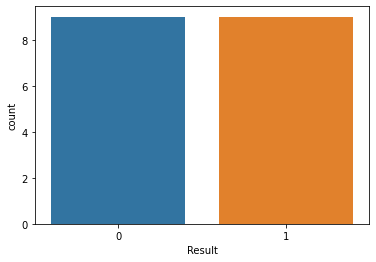

In [26]:
sns.countplot(x="Result",data=df)

##2b) Plot Pass/Fail vs Number of Hours Studied

Text(0, 0.5, 'Pass/Fail')

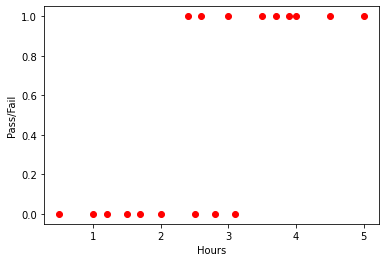

In [27]:
plt.scatter(df.Hours,df.Result,color='red')
plt.xlabel("Hours")
plt.ylabel("Pass/Fail")

##2c) Plot Logistics Regression Curve

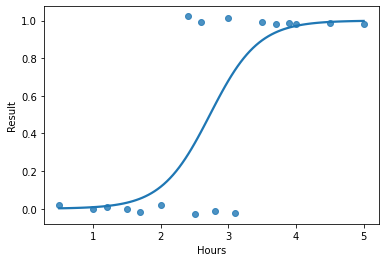

In [28]:
sns.regplot(x = df.Hours, y = df.Result, y_jitter=0.03, data=df, logistic = True, ci = None)

plt.show()

#the Threshold Value of 0.5 (point between 0 and 1) seems to appear at 3 hours
#meaning, anything > 3 hours --> PASS
#anything < 3 hours --> FAIL



---



#Step 3: Train Test Split

##3a) Drop the StudentID Column

In [29]:
df1=df.drop("StudentId",axis=1)
df1

,Hours,Result
0,1.0,0
1,1.2,0
2,1.5,0
3,1.7,0
4,2.0,0
5,2.4,1
6,2.5,0
7,2.6,1
8,2.8,0
9,3.0,1


##3b) Seperate into 'x: Hours' vs 'y: Result'

In [37]:
x = df1.iloc[:,0:1]
y = df1.iloc[:,1:]

# x--> Hours
# y --> Result

##3c) Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=2)

#20% for testing, 80% for training

##3d) Import Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

##3e) Training the Model

In [40]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

##3f) Checking out the Binary Classes

In [41]:
model.classes_

array([0, 1])

##3g) Predict the X_test Dataset

In [42]:
predictions=model.predict(X_test)

In [44]:
X_test

,Hours
9,3.0
4,2.0
16,3.1
0,1.0


In [43]:
predictions

#meaning, study for 3 hours --> Pass
#study for 2 hours --> Fail
#study for 3.1 hours --> Pass
#Study for 1 hour --> Fail

array([1, 0, 1, 0])

In [48]:
probabilities = model.predict_proba(X_test)

print(probabilities)

#66% chance that if you study 3 hours you will pass
#67% chance that if you study 2 hours you will fail
#69% chance that if you study 3.1 hours you will pass
#89% chance that if you study 1 hour you will fail

[[0.33864801 0.66135199]
 [0.67677464 0.32322536]
 [0.30785719 0.69214281]
 [0.8954164  0.1045836 ]]




---



#Step 4: Metrics

##4a) Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predictions)
print (cm)

[[2 1]
 [0 1]]


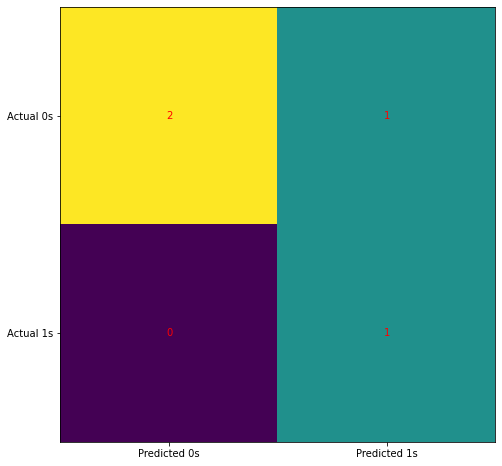

In [46]:
fig, ax=plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)

for i in range (2):
  for j in range (2):
    ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

plt.show()

#we have ONE Type 1 Error occuring: Actual FAIL but Predicted PASS

##4b) Accuracy Score

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions)

#1/4 of the actual y_test labeled was predicted wrongly --> 25% reduction in accuracy
#thus accuracy = 25%

0.75

##4c) Classification Report

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

#in this case, we simply use Accuracy of 75% as the metric
#and ignore other metrics

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4





---



#Step 5: New Prediction using New Value

In [50]:
model.predict(np.array([[7]]))

#what if a student studied 7 hours? will he pass?
#YES!

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [51]:
model.predict_proba(np.array([[7]]))

#there's a 99% chance that he will pass
#if he studies 7 hours! 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[0.00182823, 0.99817177]])



---



#THE END

---

